Disciplina: Coleta e Armazenamento de Dados
Técnica: Web Scraping
Linguagem: Python

Aluno: Rodrigo da Costa Aglinskas
Orientador: Fabio Silva Lopes

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
req = requests.get('https://www.basketball-reference.com/leagues/NBA_2018_totals.html')
if req.status_code == 200:
    print('Requisição bem sucedida!')
    content = req.content

Requisição bem sucedida!


In [3]:
soup = BeautifulSoup(content, 'html.parser')
table = soup.find(name='table')

In [5]:
table_str = str(table)
df = pd.read_html(table_str)[0]

In [6]:
table = soup.find(name='table', attrs={'id':'confs_standings_W'})

In [7]:
def scrape_stats(base_url, year_start, year_end):
    years = range(year_start,year_end+1,1)

    final_df = pd.DataFrame()

    for year in years:
        print('Extraindo ano {}'.format(year))
        req_url = base_url.format(year)
        req = requests.get(req_url)
        soup = BeautifulSoup(req.content, 'html.parser')
        table = soup.find('table', {'id':'totals_stats'})
        df = pd.read_html(str(table))[0]
        df['Year'] = year
        final_df = final_df.append(df)
    return final_df
url = 'https://www.basketball-reference.com/leagues/NBA_{}_totals.html'
df = scrape_stats(url, 2013, 2018)

Extraindo ano 2013
Extraindo ano 2014
Extraindo ano 2015
Extraindo ano 2016
Extraindo ano 2017
Extraindo ano 2018


In [8]:
drop_indexes = df[df['Rk'] == 'Rk'].index # Pega indexes onde a coluna 'Rk' possui valor 'Rk'
df.drop(drop_indexes, inplace=True) # elimina os valores dos index passados da tabela

In [9]:
numeric_cols = df.columns.drop(['Player','Pos','Tm'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

In [39]:
df.reset_index(inplace=True)

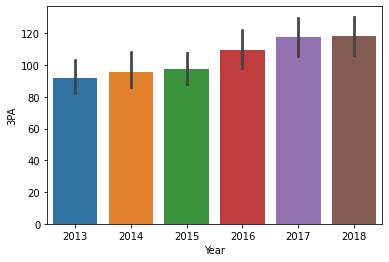

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.barplot(x="Year", y="3PA", data=df)

In [37]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Quincy Acy,PF,22,TOR,29,0,342,42,75,0.560,1,2,0.5,41,73,0.562,0.567,31,38,0.816,30,47,77,11,13,15,17,53,116,2013
1,2,Jeff Adrien,PF,26,CHA,52,5,713,72,168,0.429,0,2,0.0,72,166,0.434,0.429,65,100,0.650,68,128,196,36,18,27,32,80,209,2013
2,3,Arron Afflalo,SF,27,ORL,64,64,2307,397,905,0.439,72,240,0.3,325,665,0.489,0.478,191,223,0.857,29,210,239,206,40,11,138,137,1057,2013
3,4,Josh Akognon,PG,26,DAL,3,0,9,2,4,0.500,1,2,0.5,1,2,0.500,0.625,0,0,NaN,0,1,1,1,0,0,0,3,5,2013
4,5,Cole Aldrich,C,24,TOT,45,0,388,44,80,0.550,0,0,NaN,44,80,0.550,0.550,12,20,0.600,30,90,120,9,5,23,23,60,100,2013


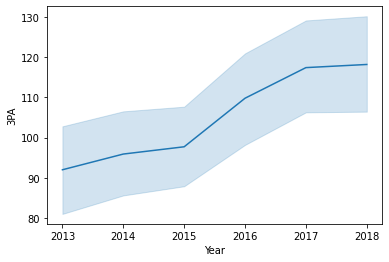

In [41]:
sns.lineplot(data=df, x="Year", y="3PA")
plt.show()

In [23]:
sorted_df = df.sort_values(by=['3P'], axis=0, ascending=False)
sorted_df[['Player','3P','Year', '3PA']].head()

,Player,3P,Year,3PA
121,Stephen Curry,402,2016,886
124,Stephen Curry,324,2017,789
140,Stephen Curry,286,2015,646
123,Stephen Curry,272,2013,600
543,Klay Thompson,268,2017,647


In [14]:
grouped_df = df.groupby('Player', as_index=False).sum()
sorted_df = grouped_df.sort_values(by=['3P'], axis=0, ascending=False)
sorted_df[['Player','3P','3PA']].head()

,Player,3P,3PA
792,Stephen Curry,1496,3422
369,James Harden,1327,3659
530,Kyle Korver,1241,2746
517,Klay Thompson,1170,2774
170,Damian Lillard,1051,2893
